<a class="anchor" id="0"></a>

# **ARIMA for Time Series Forecasting**




**ARIMA for time series forecasting**. 

ARIMA model is used to forecast a time series using the series past values. In this notebook, we will build an **optimal ARIMA model** and extend it to **Seasonal ARIMA (SARIMA)** and **SARIMAX models**. We will also see how to build autoarima models in python.


<a class="anchor" id="0.1"></a>
# **Table of Contents** 


1.	[Introduction to Time Series Forecasting](#1)
2.	[Introduction to ARIMA Models](#2)
3.	[The meaning of p, d and q in ARIMA model](#3)
4.	[AR and MA models](#4)
5.	[How to find the order of differencing (d) in ARIMA model](#5)
6.	[How to find the order of the AR term (p)](#6)
7.	[How to find the order of the MA term (q)](#7)
8.	[How to handle if a time series is slightly under or over differenced](#8)
9.	[How to build the ARIMA Model](#9)
10.	[Auto Arima Forecasting in Python](#10)
11.	[SARIMA model in python](#11)
12.	[SARIMAX model with exogeneous variables](#12)



# **1. Introduction to Time Series Forecasting** <a class="anchor" id="1"></a>

[Table of Contents](#0.1)


- A **Time Series** is defined as a series of data points recorded at different time intervals. The time order can be daily, monthly, or even yearly.

- Time Series forecasting is the process of using a statistical model to predict future values of a time series based on past results.

- Forecasting is the step where we want to predict the future values the series is going to take. Forecasting a time series is often of tremendous commercial value.

#### **Forecasting a time series can be broadly divided into two types.**

- If we use only the previous values of the time series to predict its future values, it is called **Univariate Time Series Forecasting.**

- If we use predictors other than the series (like exogenous variables) to forecast it is called **Multi Variate Time Series Forecasting.**

- This notebook focuses on a particular type of forecasting method called **ARIMA modeling.**



# **2. Introduction to ARIMA Models** <a class="anchor" id="2"></a>

[Table of Contents](#0.1)


- **ARIMA** stands for **Autoregressive Integrated Moving Average Model**. It belongs to a class of models that explains a given time series based on its own past values -i.e.- its own lags and the lagged forecast errors. The equation can be used to forecast future values. Any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models.


- So, **ARIMA**, short for **AutoRegressive Integrated Moving Average**, is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.


- **ARIMA Models** are specified by three order parameters: (p, d, q), 

   where,

   - p is the order of the AR term

   - q is the order of the MA term

   - d is the number of differencing required to make the time series stationary


- **AR(p) Autoregression** – a regression model that utilizes the dependent relationship between a current observation and observations over a previous period. An auto regressive (AR(p)) component refers to the use of past values in the regression equation for the time series.


- **I(d) Integration** – uses differencing of observations (subtracting an observation from observation at the previous time step) in order to make the time series stationary. Differencing involves the subtraction of the current values of a series with its previous values d number of times.


- **MA(q) Moving Average** – a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations. A moving average component depicts the error of the model as a combination of previous error terms. The order q represents the number of terms to be included in the model.




## **Types of ARIMA Model**


- **ARIMA** : Non-seasonal Autoregressive Integrated Moving Averages
- **SARIMA** : Seasonal ARIMA
- **SARIMAX** : Seasonal ARIMA with exogenous variables



If a time series, has seasonal patterns, then we need to add seasonal terms and it becomes SARIMA, short for **Seasonal ARIMA**.

# **3. The meaning of p, d and q in ARIMA model** <a class="anchor" id="3"></a>

[Table of Contents](#0.1)


## **3.1 The meaning of p**


- `p` is the order of the **Auto Regressive (AR)** term. It refers to the number of lags of Y to be used as predictors.



## **3.2 The meaning of d**


- The term **Auto Regressive**’ in ARIMA means it is a linear regression model that uses its own lags as predictors. Linear regression models, as we know, work best when the predictors are not correlated and are independent of each other. So we need to make the time series stationary.


- The most common approach to make the series stationary is to difference it. That is, subtract the previous value from the current value. Sometimes, depending on the complexity of the series, more than one differencing may be needed.


- The value of d, therefore, is the minimum number of differencing needed to make the series stationary. If the time series is already stationary, then d = 0.



## **3.3 The meaning of q**


- **q** is the order of the **Moving Average (MA)** term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

# **4. AR and MA models** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)



## **4.1 AR model**


- An **Auto Regressive (AR) model** is one where Yt depends only on its own lags. 

- That is, Yt is a function of the `lags of Yt`. It is depicted by the following equation -


![AR Model](https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-1-min.png?ezimgfmt=ng:webp/ngcb1)


where, 

- $Y{t-1}$ is the lag1 of the series, 

- $\beta1$ is the coefficient of lag1 that the model estimates, and 

- $\alpha$ is the intercept term, also estimated by the model.





## **4.2 MA model**


- Likewise a **Moving Average (MA) model** is one where Yt depends only on the lagged forecast errors. It is depicted by the following equation -


![MA Model](https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-2-min.png?ezimgfmt=ng:webp/ngcb1)





where the error terms are the errors of the autoregressive models of the respective lags. 


The errors Et and E(t-1) are the errors from the following equations :


![Error Terms of the AR Model](https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-3-min.png?ezimgfmt=ng:webp/ngcb1)





Thus, we have discussed AR and MA Models respectively.

## **4.3 ARIMA model**


- An ARIMA model is one where the time series was differenced at least once to make it stationary and we combine the AR and the MA terms. So the equation of an ARIMA model becomes :


![ARIMA Model](https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-4-min-865x77.png?ezimgfmt=ng:webp/ngcb1)





### **ARIMA model in words**:


Predicted Yt = Constant + Linear combination Lags of Y (upto p lags) + Linear Combination of Lagged forecast errors (upto q lags)



# **5. How to find the order of differencing (d) in ARIMA model**  <a class="anchor" id="5"></a>

[Table of Contents](#0.1)


- As stated earlier, the purpose of differencing is to make the time series stationary. But we should be careful to not over-difference the series. An over differenced series may still be stationary, which in turn will affect the model parameters.


- So we should determine the right order of differencing. The right order of differencing is the minimum differencing required to get a near-stationary series which roams around a defined mean and the ACF plot reaches to zero fairly quick.


- If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing. On the other hand, if the lag 1 autocorrelation itself is too negative, then the series is probably over-differenced.


- If we can’t really decide between two orders of differencing, then we go with the order that gives the least standard deviation in the differenced series.


- Now, we will explain these concepts with the help of an example as follows:-



- First, I will check if the series is stationary using the **Augmented Dickey Fuller test (ADF Test)**, from the statsmodels package. The reason being is that we need differencing only if the series is non-stationary. Else, no differencing is needed, that is, d=0.


- The null hypothesis (Ho) of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then we reject the null hypothesis and infer that the time series is indeed stationary.


- So, in our case, if P Value > 0.05 we go ahead with finding the order of differencing.

## **Routine set up**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


## **Import data**

In [2]:
path = 'dataset.txt'

df = pd.read_csv(path)

df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [3]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 3.145186
p-value: 1.000000


- Since p-value(1.00) is greater than the significance level(0.05), let’s difference the series and see how the autocorrelation plot looks like.

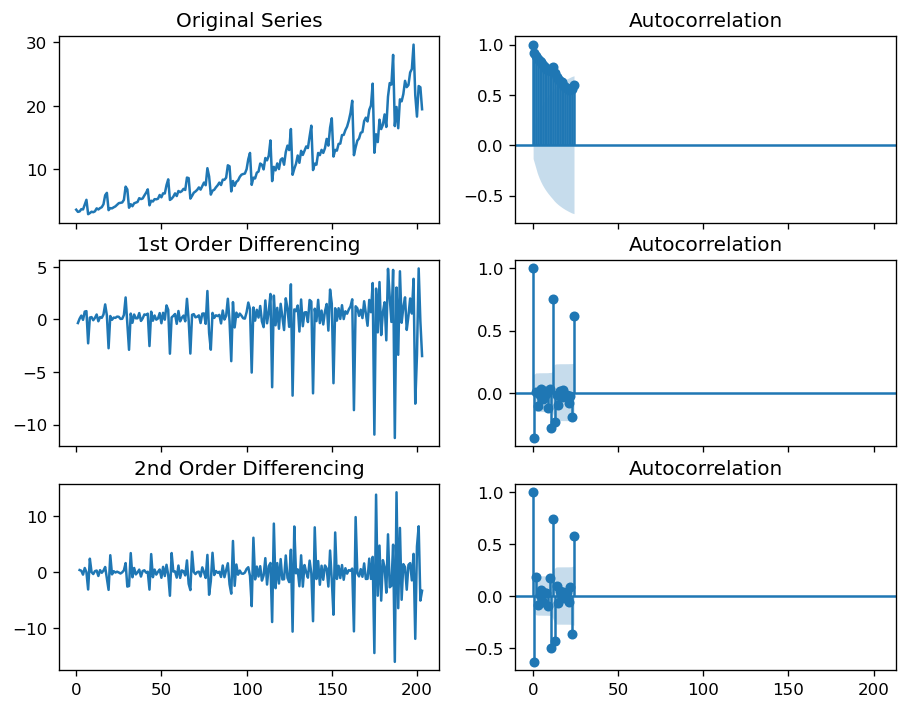

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

- For the above data, we can see that the time series reaches stationarity with two orders of differencing.



# **6. How to find the order of the AR term (p)** <a class="anchor" id="6"></a>

[Table of Contents](#0.1)


- The next step is to identify if the model needs any AR terms. We will find out the required number of AR terms by inspecting the **Partial Autocorrelation (PACF) plot**.


- **Partial autocorrelation** can be imagined as the correlation between the series and its lag, after excluding the contributions from the intermediate lags. So, PACF sort of conveys the pure correlation between a lag and the series. This way, we will know if that lag is needed in the AR term or not.


- Partial autocorrelation of lag (k) of a series is the coefficient of that lag in the autoregression equation of Y.


$$Yt = \alpha0 + \alpha1 Y{t-1} + \alpha2 Y{t-2} + \alpha3 Y{t-3}$$


- That is, suppose, if Y_t is the current series and Y_t-1 is the lag 1 of Y, then the partial autocorrelation of lag 3 (Y_t-3) is the coefficient $\alpha_3$ of Y_t-3 in the above equation.


- Now, we should find the number of AR terms. Any autocorrelation in a stationarized series can be rectified by adding enough AR terms. So, we initially take the order of AR term to be equal to as many lags that crosses the significance limit in the PACF plot.



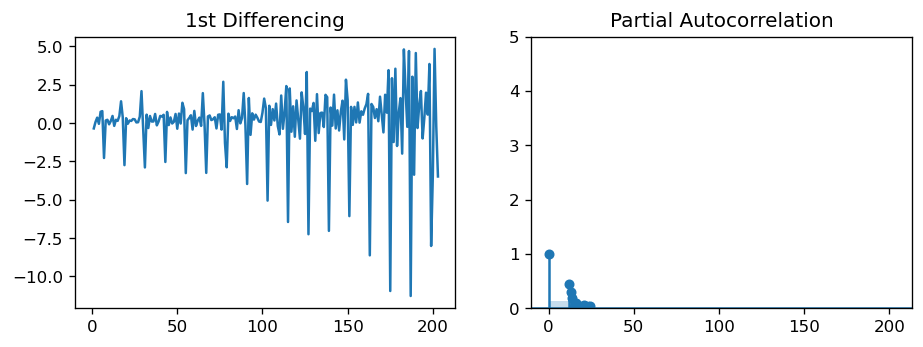

In [5]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.value.diff().dropna(), ax=axes[1])

plt.show()

- We can see that the PACF lag 1 is quite significant since it is well above the significance line. So, we will fix the value of p as 1.

# **7. How to find the order of the MA term (q)** <a class="anchor" id="7"></a>

[Table of Contents](#0.1)


- Just like how we looked at the PACF plot for the number of AR terms, we will look at the ACF plot for the number of MA terms. An MA term is technically, the error of the lagged forecast.


- The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.


- Let’s see the autocorrelation plot of the differenced series.

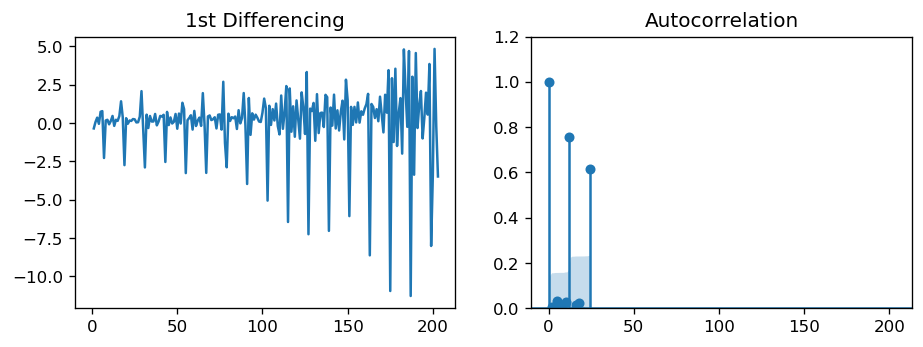

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.value.diff().dropna(), ax=axes[1])

plt.show()

- We can see that couple of lags are well above the significance line. So, we will fix q as 2. If there is any doubt, we will go with the simpler model that sufficiently explains the Y.

# **8. How to handle if a time series is slightly under or over differenced** <a class="anchor" id="8"></a>

[Table of Contents](#0.1)


- It may happen that the time series is slightly under differenced. Differencing it one more time makes it slightly over-differenced. 


- If the series is slightly under differenced, adding one or more additional AR terms usually makes it up. Likewise, if it is slightly over-differenced, we will try adding an additional MA term.

# **9. How to build the ARIMA Model** <a class="anchor" id="9"></a>


[Table of Contents](#0.1)


Now, we have determined the values of p, d and q. We have everything needed to fit the ARIMA model. We will use the ARIMA() implementation in the statsmodels package.

In [32]:
pip install statsmodels==0.12.2

Note: you may need to restart the kernel to use updated packages.


In [33]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    model = ARIMA(df.value, order=(1,1,2))
    model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  203
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -417.781
Method:                       css-mle   S.D. of innovations              1.889
Date:                Mon, 18 Apr 2022   AIC                            845.561
Time:                        18:42:26   BIC                            862.127
Sample:                    08-01-1991   HQIC                           852.263
                         - 06-01-2008                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0964      0.017      5.655      0.000       0.063       0.130
ar.L1.D.value     0.4019      0.173      2.319      0.020       0.062       0.742
ma.L1.D.value    -1.0114      0.178     

- The model summary provides lot of information. The table in the middle is the coefficients table where the values under ‘coef’ are the weights of the respective terms.

- The coefficient of the MA2 term is close to zero and the P-Value in ‘P>|z|’ column is highly insignificant. It should ideally be less than 0.05 for the respective X to be significant.

- So, we will rebuild the model without the MA2 term.

In [8]:
# 1,1,1 ARIMA Model
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    model = ARIMA(df.value, order=(1,1,1))
    model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  203
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -417.919
Method:                       css-mle   S.D. of innovations              1.890
Date:                Mon, 18 Apr 2022   AIC                            843.838
Time:                        18:23:04   BIC                            857.091
Sample:                             1   HQIC                           849.200
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0965      0.017      5.650      0.000       0.063       0.130
ar.L1.D.value     0.3140      0.075      4.183      0.000       0.167       0.461
ma.L1.D.value    -0.9164      0.026    -

- The model AIC has slightly reduced, which is good. The p-values of the AR1 and MA1 terms have improved and are highly significant (<< 0.05).

- Let’s plot the residuals to ensure there are no patterns (that is, look for constant mean and variance).

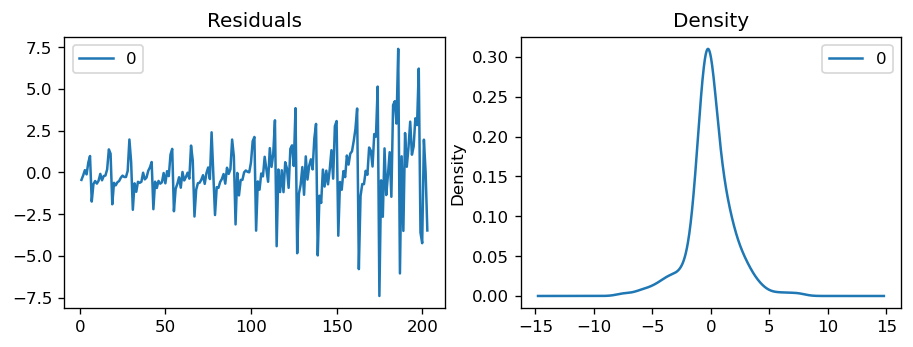

In [9]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

- The residual errors seem fine with near zero mean and uniform variance. Let’s plot the actuals against the fitted values using **plot_predict()**.

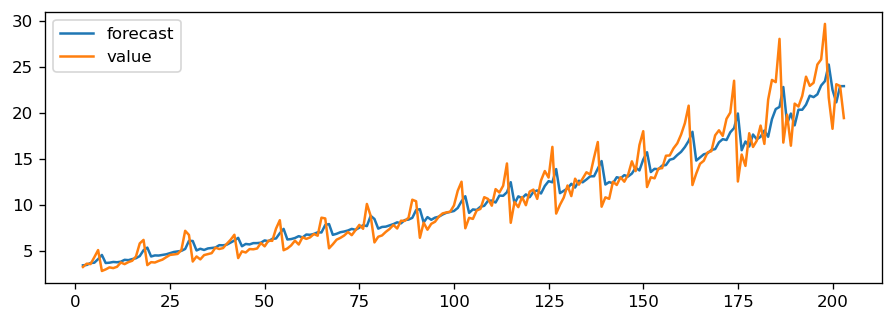

In [10]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

- When we set dynamic=False the in-sample lagged values are used for prediction. That is, the model gets trained up until the previous value to make the next prediction. This can make the fitted forecast and actuals look artificially good.

- So, we seem to have a decent ARIMA model. But, we can’t say that this is the best ARIMA model because we haven’t actually forecasted into the future and compared the forecast with the actual performance.

- So, the real validation we need now is the Out-of-Time cross-validation, discussed next.

# **10. Auto Arima Forecasting in Python** <a class="anchor" id="10"></a>


[Table of Contents](#0.1)


- In Python, the `pmdarima` package provides `auto_arima()` function which can be used to automate the process of ARIMA Forecasting in Python.

- `auto_arima()` uses a stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC.

- We need to install the `pmdarima` package first.

In [17]:
!pip install pmdarima

In [18]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=874.416, Time=0.76 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1602.665, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=913.571, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1392.713, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=865.809, Time=0.43 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=867.147, Time=0.47 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=871.437, Time=0.52 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=868.483, Time=0.36 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=858.292, Time=0.75 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.79 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=859.374, Time=0.81 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=860.865, Time=0.97 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0]          
Total fit 

# **11. SARIMA model in python** <a class="anchor" id="11"></a>


[Table of Contents](#0.1)


- The plain ARIMA model has a problem. It does not support seasonality.


- If the time series has defined seasonality, then we should go for **Seasonal ARIMA** model (in short **SARIMA**) which uses seasonal differencing.


- Seasonal differencing is similar to regular differencing, but, instead of subtracting consecutive terms, we subtract the value from previous season.


- So, the model will be represented as **SARIMA(p,d,q)x(P,D,Q)**, where, P, D and Q are SAR, order of seasonal differencing and SMA terms respectively and 'x' is the frequency of the time series. If the model has well defined seasonal patterns, then enforce D=1 for a given frequency ‘x’.


- We should set the model parameters such that D never exceeds one. And the total differencing ‘d + D’ never exceeds 2. We should try to keep only either SAR or SMA terms if the model has seasonal components.


- Now, we will build a SARIMA model on the time series dataset.

- But, first import the dataset

In [20]:
data = pd.read_csv('dataset.txt', parse_dates=['date'], index_col='date')

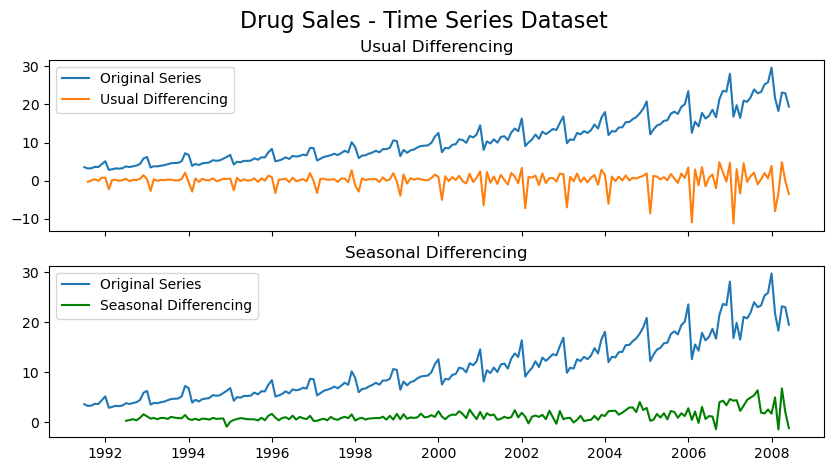

In [21]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasonal Differencing
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Drug Sales - Time Series Dataset', fontsize=16)
plt.show()

- We can see that, the seasonal spikes are intact after applying usual differencing (lag 1). Whereas, it is rectified after seasonal differencing.

- Now, let’s build the SARIMA model using pmdarima‘s `auto_arima()`. To do so, we need to set seasonal=True, set the frequency m=12 for month wise series and enforce D=1.

In [22]:
# !pip3 install pyramid-arima (already done)
import pmdarima as pm




In [23]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=534.818, Time=1.91 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=624.061, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=596.068, Time=0.61 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=611.475, Time=0.45 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=757.274, Time=0.05 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=559.407, Time=0.40 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=2.62 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=536.817, Time=6.26 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=543.106, Time=1.54 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=537.698, Time=7.52 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=594.467, Time=0.39 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=529.829, Time=1.40 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=555.198, Time=0.46 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=3.20 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : AI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  204
Model:             SARIMAX(1, 0, 2)x(1, 1, 2, 12)   Log Likelihood                -253.952
Date:                            Mon, 18 Apr 2022   AIC                            523.904
Time:                                    18:29:21   BIC                            549.964
Sample:                                         0   HQIC                           534.458
                                            - 204                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0052      0.009      0.581      0.561      -0.012       0.023
ar.L1          0.9767      0.018     52.922      0.000       0.941       1.013
ma.L1         -0.9116      0.056    -16.142      0.000      -1.022      -0.801
ma.L2          0.2167      0.059      3.685      0.000       0.101       0.332
ar.S.L12       0.8428      0.155      5.453      0.000       0.540       1.146
ma.S.L12      -1.5853      0.176     -9.015      0.000      -1.930      -1.241
ma.S.L24       0.7679      0.111      6.917      0.000       0.550       0.986
sigma2         0.7473      0.066     11.324      0.000       0.618       0.877
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):               142.57
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):              14.48   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The model has estimated the AIC and the P values of the coefficients look significant. Let’s look at the residual diagnostics plot.

The best model SARIMAX(3, 0, 0)x(0, 1, 1, 12) has an AIC of 528.6 and the P Values are significant.

Let’s forecast for the next 24 months.

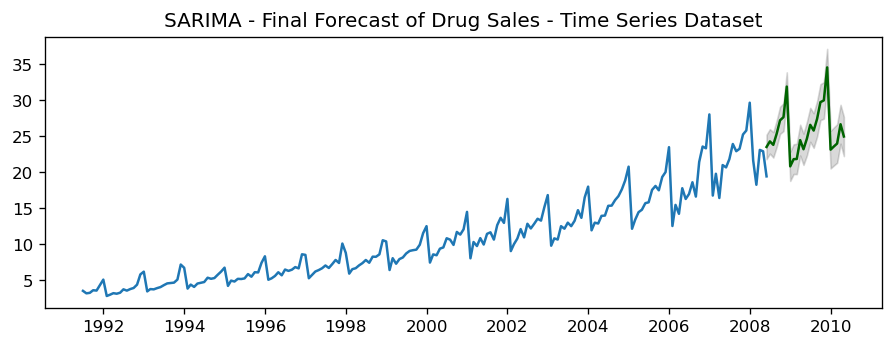

In [24]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Drug Sales - Time Series Dataset")
plt.show()

There you have a nice forecast that captures the expected seasonal demand pattern.

# **12. SARIMAX model with exogeneous variables** <a class="anchor" id="12"></a>


[Table of Contents](#0.1)


- Now, we will force an external predictor, also called, `exogenous variable` into the model. This model is called the `SARIMAX model`. The only requirement to use an exogenous variable is we should know the value of the variable during the forecast period as well.

- I want to see how the model looks if we force the recent seasonality pattern into the training and forecast. The seasonal index is a good exogenous variable because it repeats every frequency cycle, 12 months in this case.

- So, we will always know what values the seasonal index will hold for the future forecasts.

- Let’s compute the seasonal index so that it can be forced as a (exogenous) predictor to the SARIMAX model.

In [25]:
# Compute Seasonal Index
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# multiplicative seasonal component
result_mul = seasonal_decompose(data['value'][-36:],   # 3 years
                                model='multiplicative', 
                                extrapolate_trend='freq')

seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

# merge with the base data
data['month'] = data.index.month
df = pd.merge(data, seasonal_index, how='left', on='month')
df.columns = ['value', 'month', 'seasonal_index']
df.index = data.index  # reassign the index

The exogenous variable (seasonal index) is ready. Let’s build the SARIMAX model.

In [26]:
import pmdarima as pm

# SARIMAX Model
sxmodel = pm.auto_arima(df[['value']], exogenous=df[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=536.818, Time=1.78 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=626.061, Time=0.08 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=598.068, Time=0.68 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=613.475, Time=0.55 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=759.274, Time=0.28 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=561.407, Time=0.54 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=2.64 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=538.817, Time=5.35 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=545.106, Time=1.82 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=539.693, Time=8.16 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=596.467, Time=0.56 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=531.829, Time=1.67 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=557.198, Time=0.59 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=3.21 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : AI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  204
Model:             SARIMAX(1, 0, 3)x(1, 1, [1, 2], 12)   Log Likelihood                -251.643
Date:                                 Mon, 18 Apr 2022   AIC                            521.286
Time:                                         18:33:36   BIC                            550.603
Sample:                                     07-01-1991   HQIC                           533.159
                                          - 06-01-2008                                         
Covariance Type:                                   opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
seasonal_index -1.533e-05   1579.437   -9.7e-09      1.000   -3095.639    3095.639
ar.L1              0.9955      0.008    125.571      0.000       0.980       1.011
ma.L1             -1.0077      0.061    -16.634      0.000      -1.126      -0.889
ma.L2              0.4886      0.078      6.254      0.000       0.335       0.642
ma.L3             -0.2511      0.065     -3.876      0.000      -0.378      -0.124
ar.S.L12           0.8470      0.150      5.665      0.000       0.554       1.140
ma.S.L12          -1.6042      0.174     -9.196      0.000      -1.946      -1.262
ma.S.L24           0.7793      0.111      7.039      0.000       0.562       0.996
sigma2             0.7190      0.066     10.835      0.000       0.589       0.849
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               228.25
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              14.55   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

[Go to Top](#0)